In [467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="is_sparse is deprecated")

In [468]:
elevation_data = pd.read_csv('elevation_vs_location.csv')
elevation_data

,x,y,Elevation
0,30.921033,-17.885700,1413
1,31.174588,-17.729478,1402
2,30.993883,-17.937023,1441
3,31.065689,-18.014479,1432
4,31.034064,-17.864239,1458
...,...,...,...
61,30.965073,-17.771210,1476
62,30.989550,-17.855230,1443
63,31.030600,-17.812500,1477
64,31.119996,-17.787922,1522


           x          y  Elevation
0  30.921033 -17.885700       1413
1  31.174588 -17.729478       1402
2  30.993883 -17.937023       1441
3  31.065689 -18.014479       1432
4  31.034064 -17.864239       1458
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x          66 non-null     float64
 1   y          66 non-null     float64
 2   Elevation  66 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.7 KB
None


<Figure size 640x480 with 0 Axes>

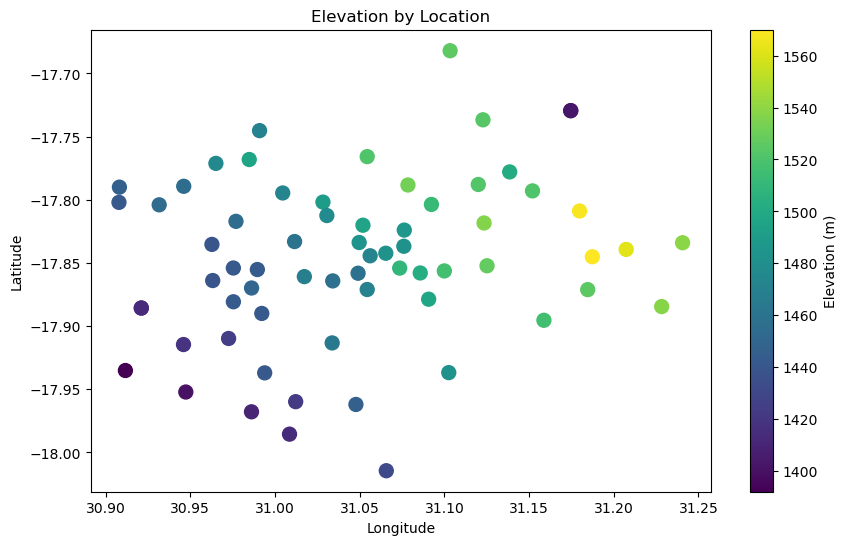

In [469]:
import matplotlib.pyplot as plt
import seaborn as sns
elevation_data = pd.read_csv('elevation_vs_location.csv')

print(elevation_data.head())
print(elevation_data.info())
plt.figure(facecolor='white')

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(elevation_data['x'], elevation_data['y'], c=elevation_data['Elevation'], cmap='viridis', s=100)
plt.title('Elevation by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(scatter, label='Elevation (m)')
plt.show()

In [470]:
# we are prdicting salary
x=elevation_data.iloc[:,0:-1].values
y=elevation_data.iloc[:,-1].values


In [471]:
# rs=745 /84
rs=745


In [472]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test=train_test_split(x,y,test_size=0.24,random_state=rs)

In [473]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [474]:
x_train=sc.fit_transform(x_train)
x_train
x_test=sc.fit_transform(x_test)
x_test

array([[-0.00455876, -0.11121505],
       [ 0.9226119 , -1.78011349],
       [ 0.76187813, -0.44410821],
       [ 1.22836524,  0.16416841],
       [ 0.53055223,  0.12191378],
       [ 0.19780548,  0.02851162],
       [ 2.34025775,  0.46162614],
       [-0.30951311,  0.60514726],
       [-0.96997849,  0.55310291],
       [-1.19720154, -1.26908406],
       [-0.54833571, -1.78450936],
       [-0.93822642,  2.0274879 ],
       [-0.08283639,  1.32286367],
       [ 0.56712888,  0.81335501],
       [-0.96371426, -0.10454435],
       [-1.53423492, -0.60460218]])

In [475]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [476]:
reg.fit(x_train,y_train)


LinearRegression()

In [477]:
reg.intercept_

1474.6000000000038

In [478]:
reg.coef_

array([27.9135268 , 12.03847511])

In [479]:
y_pred=reg.predict(x_test)

In [480]:
y_pred

array([1473.13388933, 1478.92349988, 1490.52032003, 1510.86434348,
       1490.87723978, 1480.46468492, 1545.48212228, 1473.24544784,
       1454.18299508, 1425.90404578, 1437.81124488, 1472.81865429,
       1488.21300562, 1500.22212107, 1446.44078169, 1424.49560405])

In [481]:
y_test

array([1458, 1481, 1497, 1527, 1509, 1459, 1562, 1460, 1439, 1419, 1441,
       1476, 1490, 1487, 1439, 1413])

In [482]:
from sklearn import metrics

In [483]:
R2 = metrics.r2_score(y_test,y_pred)
R2

0.8971728310192237

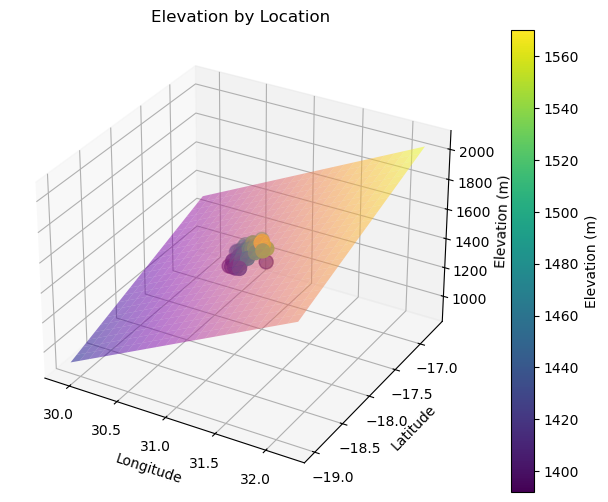

In [487]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_points_scaled = scaler.transform(meshgrid_points)
z = model.predict(meshgrid_points_scaled)
z = z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(elevation_data['x'], elevation_data['y'], elevation_data['Elevation'], c=elevation_data['Elevation'], cmap='viridis', s=100)
ax.set_title('Elevation by Location')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Elevation (m)')
fig.colorbar(scatter, label='Elevation (m)')

ax.plot_surface(xx, yy, z, alpha=0.5, cmap='plasma')

plt.show()
